In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("/kaggle/input/nifty50-stock-market-data/ADANIPORTS.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [3]:
print(df.head())



         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [4]:
print(df.shape)

(3322, 15)


In [5]:
print(df.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [6]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


# Preprocessing Data

In [7]:
# checking missing values
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [8]:
## Check for Duplicates and Remove 
df.duplicated().sum() 
df.drop_duplicates(inplace = True)  

# Taking out the Needed Datas

In [9]:

tbl = pd.DataFrame(df,columns=['Date','Open','High','Low','Last','Close'])

pd.set_option('display.max_rows', tbl.shape[0]+1)

tbl = tbl.sort_values(['Date'],ascending=False)

#print(tbl.head(5))



In [10]:
print(tbl.head(5))


            Date   Open    High     Low   Last   Close
3321  2021-04-30  739.0  759.45  724.50  726.4  730.05
3320  2021-04-29  753.2  765.85  743.40  746.4  746.75
3319  2021-04-28  755.0  760.00  741.10  743.4  746.25
3318  2021-04-27  735.0  757.50  727.35  748.6  749.15
3317  2021-04-26  733.0  739.65  728.90  729.2  730.75


In [11]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3322 entries, 3321 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3322 non-null   object 
 1   Open    3322 non-null   float64
 2   High    3322 non-null   float64
 3   Low     3322 non-null   float64
 4   Last    3322 non-null   float64
 5   Close   3322 non-null   float64
dtypes: float64(5), object(1)
memory usage: 181.7+ KB


In [12]:
tbl.describe()

,Open,High,Low,Last,Close
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000
mean,344.763019,351.608007,337.531969,344.239539,344.201626
std,193.619992,198.617808,188.676614,193.187813,193.045886
min,108.000000,110.450000,105.650000,108.000000,108.000000
25%,164.850000,168.000000,161.600000,164.075000,164.312500
50%,325.750000,331.275000,319.850000,325.000000,324.700000
75%,401.000000,407.187500,395.000000,400.912500,400.912500
max,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000


In [13]:
#Table View
labels = ['Date','Open','High','Low','Last','Close']

fig = go.Figure(data = [go.Table(header=dict(values=labels),
                 cells=dict(values=[tbl.Date,tbl.Open,tbl.High,tbl.Low,tbl.Last,tbl.Close]))
                     ])
fig.update_layout(
    title='Adani Ports Stock Data :',
)
fig.show()

# Checking the relationship of each variable with Dependent variable

Text(0.5, 1.0, 'Relationship of Closing and Opening price')

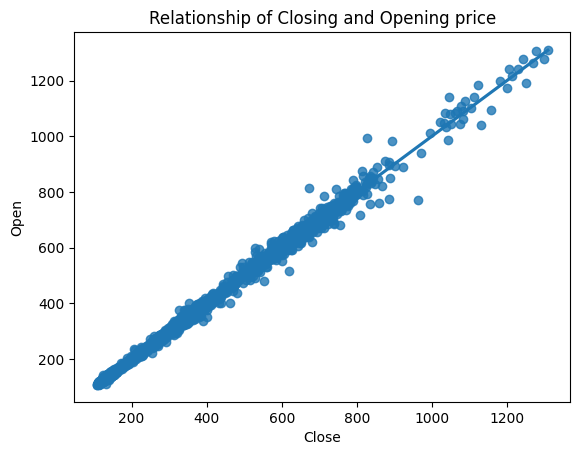

In [14]:
sns.regplot(x = tbl[['Close']], y = tbl[['Open']], data= tbl)
plt.title("Relationship of Closing and Opening price")

Text(0.5, 1.0, 'Relationship of Closing and High price')

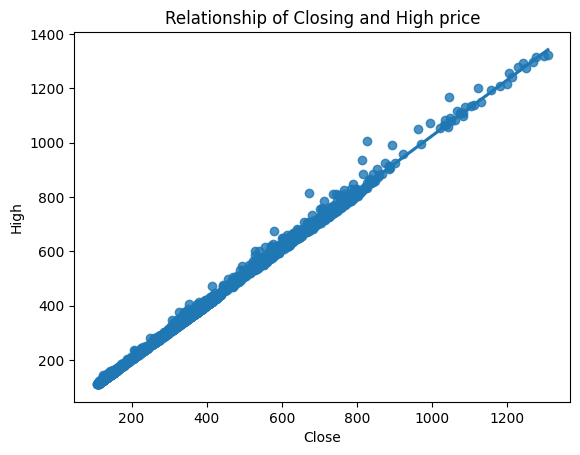

In [15]:
sns.regplot(x = tbl[['Close']], y = tbl[['High']], data= tbl)
plt.title("Relationship of Closing and High price")

Text(0.5, 1.0, 'Relationship of Closing and Low price')

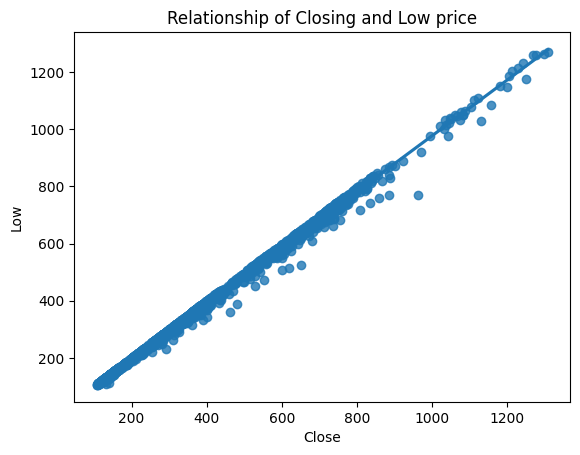

In [16]:
sns.regplot(x = tbl[['Close']], y = tbl[['Low']], data= tbl)
plt.title("Relationship of Closing and Low price")

Text(0.5, 1.0, 'Relationship of Closing and Last price')

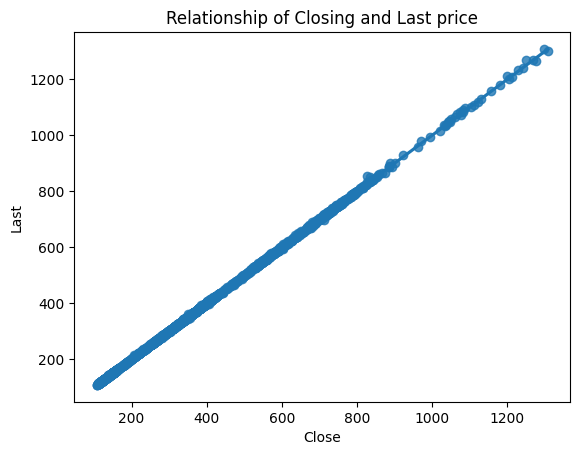

In [17]:
sns.regplot(x = tbl[['Close']], y = tbl[['Last']], data= tbl)
plt.title("Relationship of Closing and Last price")

# Data Visualization

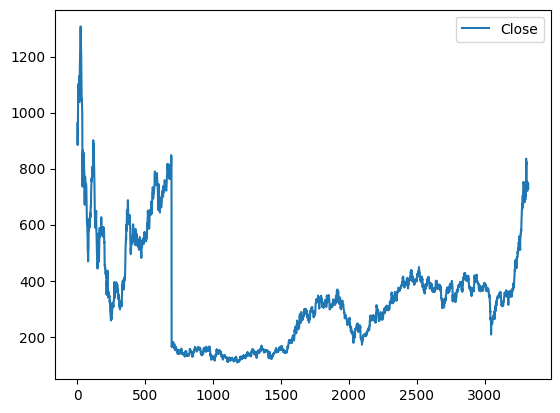

In [18]:
tbl[['Close']].plot()
plt.show()

In [19]:
#Pie Chart

fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=tbl.Date, y=tbl['High'],mode='lines',name='High',marker=dict(color="blue")))
fig1.add_trace(go.Scatter(x=tbl.Date, y=tbl['Low'],mode='lines',name='Low',marker=dict(color="red")))
#fig1.add_trace(go.Scatter(x=tbl.Date, y=tbl['Close'],mode='lines',name='Close',marker=dict(color="orange")))

fig1.update_layout(title='Adani Ports Stock with High and Low',template='plotly_dark')

fig1.show()



# Buildind Model

In [20]:
y = df[['Close']]
x = df[['Open','High','Low','Last','Prev Close']]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state  = 0)

In [22]:
#dimentions of training models
x_train.shape


(2657, 5)

In [23]:
#dimentions of testing models
x_test.shape

(665, 5)

In [24]:
model = LinearRegression()

# Train the Linear Regression Model
model.fit(x_train, y_train)

print('Intercept: ' ,  model.intercept_)
print('coefficient : ' ,  model.coef_)

Intercept:  [0.2013934]
coefficient :  [[-0.0574728   0.06425554  0.1173708   0.87993725 -0.00379516]]


In [25]:
#Predicting the model 
preds = model.predict(x_test)

#print(preds)
#print({'Actual': y_test, 'Predicted': preds})

# Predictions

In [26]:
from sklearn.metrics import r2_score

# Evaluate the model's accuracy
accuracy = r2_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.9999442507193023


# Model Evaluation

In [83]:
mean_squared_error(y_test, preds )

2.4377695907227768

In [84]:
rsqr = lm.score(x,y)

print('R - Squared :' , rsqr)

R - Squared : 0.6203833120808897


Text(0.5, 0, 'yhat')

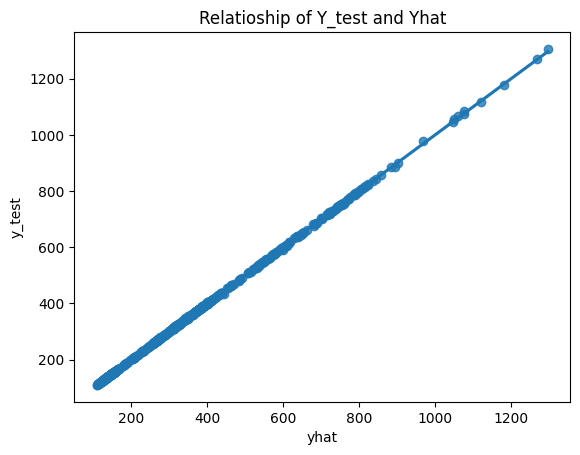

In [85]:
sns.regplot( x = y_test, y = preds , data = df)
plt.title('Relatioship of Y_test and Yhat')
plt.ylabel('y_test')
plt.xlabel('yhat')